# Code for Section 3: The discrete Fourier transform
## This code is for learning the Fourier transform.

### mikexcohen.com

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.fftpack
import random
from mpl_toolkits.mplot3d import Axes3D


---
# VIDEO: How it works
---


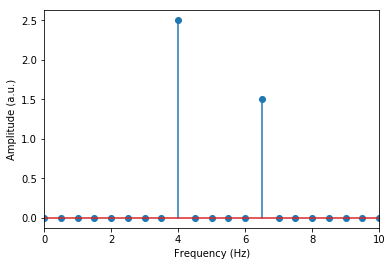

In [2]:
## The DTFT in loop-form

# create the signal
srate  = 1000 # hz
time   = np.arange(0.,2.,1/srate) # time vector in seconds
pnts   = len(time) # number of time points
signal = 2.5 * np.sin( 2*np.pi*4*time ) + 1.5 * np.sin( 2*np.pi*6.5*time )


# prepare the Fourier transform
fourTime = np.array(range(0,pnts))/pnts
fCoefs   = np.zeros((len(signal)),dtype=complex)

for fi in range(0,pnts):
    
    # create complex sine wave
    csw = np.exp( -1j*2*np.pi*fi*fourTime )
    
    # compute dot product between sine wave and signal
    # these are called the Fourier coefficients
    fCoefs[fi] = np.sum( np.multiply(signal,csw) ) / pnts


# extract amplitudes
ampls = 2*np.abs(fCoefs)

# compute frequencies vector
hz = np.linspace(0,srate/2,num=math.floor(pnts/2.)+1)

plt.stem(hz,ampls[range(0,len(hz))])
plt.xlabel('Frequency (Hz)'), plt.ylabel('Amplitude (a.u.)')
plt.xlim(0,10)
plt.show()



---
# VIDEO: Converting indices to frequencies
---


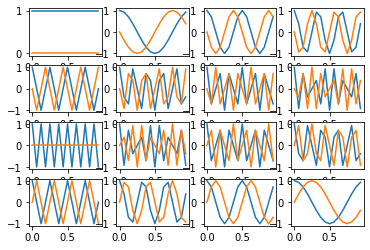

In [2]:

pnts     = 16 # number of time points
fourTime = np.array(range(0,pnts))/pnts

for fi in range(0,pnts):
    # create complex sine wave
    csw = np.exp( -1j*2*np.pi*fi*fourTime )
    
    # and plot it
    
    loc = np.unravel_index(fi,[4, 4],'F')
    plt.subplot2grid((4,4),(loc[1],loc[0]))
    plt.plot(fourTime,np.real(csw))
    plt.plot(fourTime,np.imag(csw))

plt.show()

# VIDEO: Normalized time vector

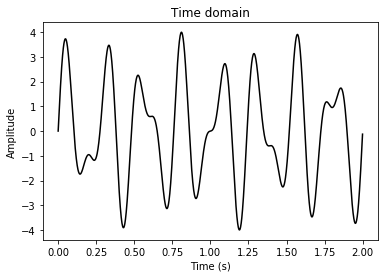

In [14]:
# create the signal
srate  = 1000 # hz
time   = np.arange(0,2*srate)/srate # time vector in seconds
pnts   = len(time) # number of time points
signal = 2.5 * np.sin( 2*np.pi*4*time ) + \
         1.5 * np.sin( 2*np.pi*6.5*time )


# show the original signal
plt.plot(time,signal,'k')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Time domain')
plt.show()

In [22]:
# prepare the Fourier transform
fourTime = np.arange(0,pnts)/pnts
fCoefs   = np.zeros(len(signal),dtype=complex)

for fi in range(pnts):
    
    # create complex sine wave
    csw = np.exp( -1j*2*np.pi*fi*fourTime )
    
    # compute dot product between sine wave and signal
    # these are called the Fourier coefficients
    fCoefs[fi] = sum( signal*csw ) / pnts

# extract amplitudes
ampls = 2*abs(fCoefs)

/home/mxc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """


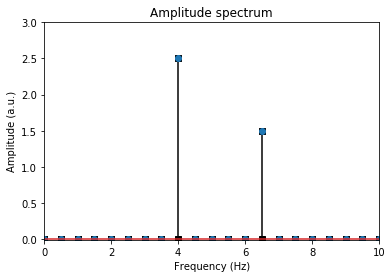

/home/mxc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


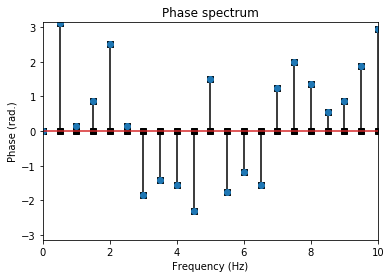

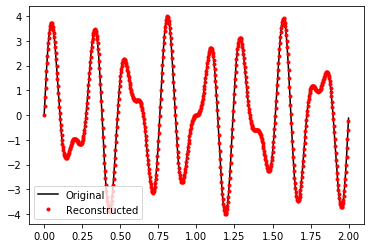

In [23]:
# compute frequencies vector
hz = np.linspace(0,srate/2,int(np.floor(pnts/2)+1))

# plot amplitude
plt.stem(hz,ampls[:len(hz)],'ks-')

# make plot look a bit nicer
plt.xlim([0,10])
plt.ylim([-.01,3])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (a.u.)')
plt.title('Amplitude spectrum')
plt.show()


# plot angles
plt.stem(hz,np.angle(fCoefs[:len(hz)]),'ks-')

# make plot look a bit nicer
plt.xlim([0,10])
plt.ylim([-np.pi,np.pi])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (rad.)')
plt.title('Phase spectrum')
plt.show()


# finally, plot reconstructed time series on top of original time series
reconTS = np.real(scipy.fftpack.ifft( fCoefs ))*pnts

plt.plot(time,signal,'k',label='Original')
plt.plot(time[::3],reconTS[::3],'r.',label='Reconstructed')
plt.legend()
plt.show()


---
# VIDEO: Scaling Fourier coefficients
---


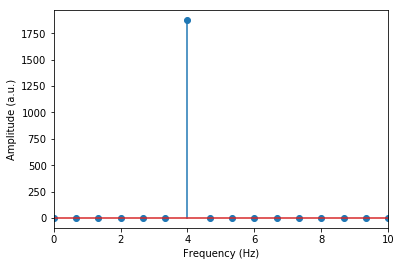

In [4]:
## incorrect amplitude units without normalizations

# create the signal
srate  = 1000 # hz
time   = np.arange(0.,1.5,1/srate)  # time vector in seconds
pnts   = len(time)   # number of time points
signal = 2.5 * np.sin( 2*np.pi*4*time )


# prepare the Fourier transform
fourTime = np.array(range(0,pnts))/pnts
fCoefs   = np.zeros(len(signal),dtype=complex)

for fi in range(0,pnts):
    # create complex sine wave and compute dot product with signal
    csw = np.exp( -1j*2*np.pi*fi*fourTime )
    fCoefs[fi] = np.sum( np.multiply(signal,csw) )


# extract amplitudes
ampls = np.abs(fCoefs);

# compute frequencies vector
hz = np.linspace(0,srate/2,num=math.floor(pnts/2.)+1)

plt.stem(hz,ampls[range(0,len(hz))])
plt.xlabel('Frequency (Hz)'), plt.ylabel('Amplitude (a.u.)')
plt.xlim(0,10)
plt.show()


---
# VIDEO: Phase (this is the code used to generate the plots in the video)
---


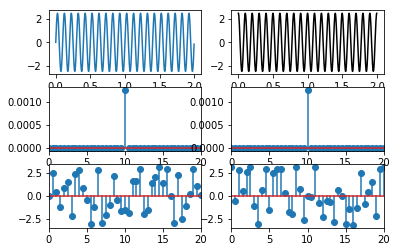

In [18]:
## same amplitude, different phase

# simulation parameters
srate = 1000
time  = np.arange(0.,2.,1/srate)
npnts = len(time)

# generate signal
signal1 = 2.5*np.sin(2*np.pi*10*time +   0  ) # different phase values
signal2 = 2.5*np.sin(2*np.pi*10*time + np.pi/2 )


# prepare the Fourier transform
fourTime = np.array(range(0,npnts)) / npnts
signal1X = np.zeros((len(signal1)),dtype=complex)
signal2X = np.zeros((len(signal2)),dtype=complex)

for fi in range(0,npnts):
    
    # create complex sine wave
    csw = np.exp( -1j*2*np.pi*fi*fourTime )
    
    # compute dot product between sine wave and signal
    # these are called the Fourier coefficients
    signal1X[fi] = np.sum( np.multiply(signal1,csw) ) / npnts
    signal2X[fi] = np.sum( np.multiply(signal2,csw) ) / npnts


# frequencies vector
hz = np.linspace(0,srate/2,num=math.floor(npnts/2.)+1)

# extract correctly-normalized amplitude
signal1Amp = np.abs(signal1X[range(0,len(hz))]/npnts)
signal1Amp[1:] = 2*signal1Amp[1:]

signal2Amp = np.abs(signal2X[range(0,len(hz))]/npnts)
signal2Amp[1:] = 2*signal2Amp[1:]


# now extract phases
signal1phase = np.angle(signal1X[0:len(hz)])
signal2phase = np.angle(signal2X[0:len(hz)])


# plot time-domain signals
plt.subplot2grid((3,2),(0,0))
plt.plot(time,signal1)

plt.subplot2grid((3,2),(0,1))
plt.plot(time,signal2,'k')

plt.subplot2grid((3,2),(1,0))
plt.stem(hz,signal1Amp)
plt.xlim([0,20])

plt.subplot2grid((3,2),(1,1))
plt.stem(hz,signal2Amp)
plt.xlim([0,20])

plt.subplot2grid((3,2),(2,0))
plt.stem(hz,signal1phase)
plt.xlim([0,20])

plt.subplot2grid((3,2),(2,1))
plt.stem(hz,signal2phase)
plt.xlim([0,20])

plt.show()


---
# VIDEO: Averaging Fourier coefficients
---


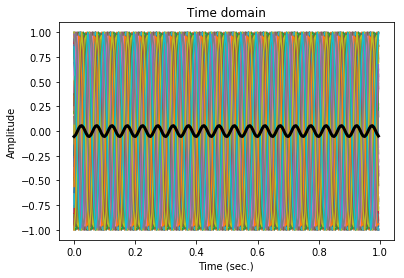

In [57]:
# simulation parameters
ntrials = 100
srate   = 200 # Hz
time    = np.arange(0,1,1/srate)
pnts    = len(time)


# create dataset
data = np.zeros((ntrials,pnts))
for triali in range(0,ntrials):
    data[triali,:] = np.sin(2*np.pi*20*time + 2*np.pi*np.random.rand())

# plot the data
for i in range(0,ntrials):
    plt.plot(time,data[i,:])
plt.plot(time,np.mean(data,axis=0),'k',linewidth=3)
plt.xlabel('Time (sec.)')
plt.ylabel('Amplitude')
plt.title('Time domain')
# plt.xlim([0,.1])

plt.show()


/home/mxc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/mxc/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: stem() got an unexpected keyword argument 'linewidth'. This will raise a TypeError in future versions.
  warnings.warn(message, mplDeprecation, stacklevel=1)


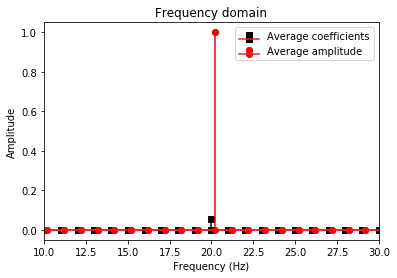

In [58]:
# get Fourier coefficients
dataX = scipy.fftpack.fft(data,axis=1) / pnts
hz = np.linspace(0,srate/2,np.floor(pnts/2)+1)

# averaging option 1: complex Fourier coefficients, then magnitude
ave1 = 2*np.abs( np.mean(dataX,axis=0) )

# averaging option 2: magnitude, then complex Fourier coefficients
ave2 = np.mean( 2*np.abs(dataX),axis=0 )

# plot both amplitude spectra
plt.stem(hz,ave1[0:len(hz)],'ks-',linewidth=3,markersize=10,label='Average coefficients')
plt.stem(hz+.2,ave2[0:len(hz)],'ro-',linewidth=3,markersize=10,label='Average amplitude')
plt.xlim([10,30])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Frequency domain')
plt.legend()
plt.show()


---
# VIDEO: The DC coefficient
---


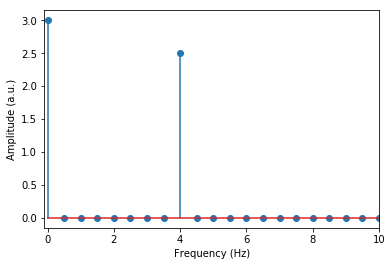

In [19]:
## incorrect DC reconstruction without careful normalization

# create the signal
srate  = 1000 # hz
time   = np.arange(0.,2.,1/srate) # time vector in seconds
pnts   = len(time) # number of time points
signal =  1.5 + 2.5*np.sin( 2*np.pi*4*time )


# prepare the Fourier transform
fourTime = np.array(range(0,pnts))/pnts
fCoefs   = np.zeros(len(signal),dtype=complex)

for fi in range(0,pnts):
    # create complex sine wave and compute dot product with signal
    csw = np.exp( -1j*2*np.pi*fi*fourTime )
    fCoefs[fi] = np.sum( np.multiply(signal,csw) )


# extract amplitudes
ampls = 2*np.abs(fCoefs/pnts);

# compute frequencies vector
hz = np.linspace(0,srate/2,num=math.floor(pnts/2.)+1)

plt.stem(hz,ampls[0:len(hz)])
plt.xlim(-.1,10)
plt.xlabel('Frequency (Hz)'), plt.ylabel('Amplitude (a.u.)')
plt.show()



---
# VIDEO: Amplitude spectrum vs. power spectrum
---


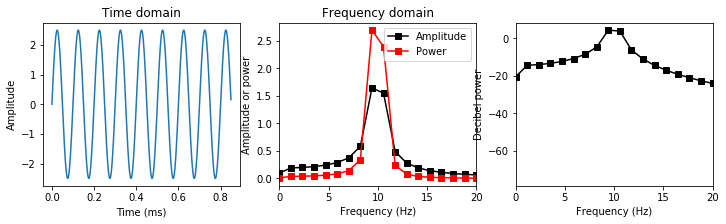

In [34]:
# simulation parameters
srate = 1000
time  = np.arange(0,.85,1/srate)
npnts = len(time)

# generate signal
signal = 2.5*np.sin(2*np.pi*10*time)

# Fourier transform and frequencies
signalX = scipy.fftpack.fft(signal) / npnts
hz = np.linspace(0,srate/2,int(np.floor(len(time)/2)+1))


# extract correctly-normalized amplitude
signalAmp = np.abs(signalX[0:len(hz)])
signalAmp[1:] = 2*signalAmp[1:]

# and power
signalPow = signalAmp**2


plt.figure(figsize=(12,3))

# plot time-domain signal
plt.subplot2grid((1,3),(0,0))
plt.plot(time,signal)
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.title('Time domain')


# plot frequency domain spectra
plt.subplot2grid((1,3),(0,1))
plt.plot(hz,signalAmp,'ks-',label='Amplitude')
plt.plot(hz,signalPow,'rs-',label='Power')

plt.xlim([0,20])
plt.legend()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude or power')
plt.title('Frequency domain')

# plot dB power
plt.subplot2grid((1,3),(0,2))
plt.plot(hz,10*np.log10(signalPow),'ks-')
plt.xlim([0,20])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Decibel power')

plt.show()